# MLSD Assignment 2 - FMA dataset

We want to cluster a dataset made up of music tracks, where the features are several measures of the audio file.

First we will apply clustering to a small number of samples (the small dataset), and find the optimal $k$ then apply clustering to the whole dataset.

In [1]:
%pip install pyspark
%pip install numpy
%pip install pandas==1.5.3
%pip install scikit-learn 
%pip install matplotlib
%pip install seaborn

%matplotlib inline


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import pairwise_distances
import numpy as np
from tqdm import tqdm #progress bar

sns.set_style('darkgrid')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

### Get every track id belonging to the small dataset (subset == 'small'). Need to use tracks.csv for this
From tracks.csv, the column that we want is '32'.

In [3]:
tracks_df = pd.read_csv('data/fma/tracks.csv', header = None)
tracks_df[32].head(10)

C:\Users\franc\AppData\Local\Temp\ipykernel_3332\3117271765.py:1: DtypeWarning: Columns (0,1,5,6,8,12,18,20,21,22,24,33,34,38,39,44,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  tracks_df = pd.read_csv('data/fma/tracks.csv', header = None)


0       set
1    subset
2       NaN
3     small
4    medium
5     small
6     small
7     large
8     large
9     large
Name: 32, dtype: object

In [4]:
# Get rows that are from the small dataset
small_subset = tracks_df[tracks_df[32] == 'small']
small_subset = small_subset[[0, 32]]
small_subset

,0,32
3,2,small
5,5,small
6,10,small
18,140,small
19,141,small
...,...,...
105716,154308,small
105717,154309,small
105818,154413,small
105819,154414,small


In [5]:
tracks_small_ids = small_subset[0].tolist()
tracks_small_ids

['2',
 '5',
 '10',
 '140',
 '141',
 '148',
 '182',
 '190',
 '193',
 '194',
 '197',
 '200',
 '203',
 '204',
 '207',
 '210',
 '211',
 '212',
 '213',
 '255',
 '256',
 '368',
 '424',
 '459',
 '534',
 '540',
 '546',
 '574',
 '602',
 '615',
 '620',
 '621',
 '625',
 '666',
 '667',
 '676',
 '690',
 '694',
 '695',
 '704',
 '705',
 '706',
 '707',
 '708',
 '709',
 '714',
 '715',
 '716',
 '718',
 '777',
 '814',
 '821',
 '822',
 '825',
 '853',
 '890',
 '892',
 '897',
 '993',
 '995',
 '997',
 '998',
 '1039',
 '1040',
 '1066',
 '1069',
 '1073',
 '1075',
 '1082',
 '1083',
 '1087',
 '1102',
 '1193',
 '1195',
 '1196',
 '1197',
 '1249',
 '1259',
 '1270',
 '1276',
 '1277',
 '1278',
 '1417',
 '1427',
 '1443',
 '1482',
 '1510',
 '1544',
 '1642',
 '1644',
 '1649',
 '1661',
 '1663',
 '1666',
 '1673',
 '1680',
 '1681',
 '1682',
 '1683',
 '1684',
 '1685',
 '1686',
 '1687',
 '1688',
 '1689',
 '1701',
 '1702',
 '1703',
 '1704',
 '1706',
 '1720',
 '1732',
 '1733',
 '1735',
 '1736',
 '1883',
 '1891',
 '1893',
 '192

Verify if it has 8000 samples as it is expected.

In [6]:
len(tracks_small_ids)

8000

### Select the correct tracks from features.csv

In [7]:
features_df = pd.read_csv('data/fma/features.csv')
features_df.head(10)

C:\Users\franc\AppData\Local\Temp\ipykernel_3332\3855304473.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,2

,feature,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,...,tonnetz.39,tonnetz.40,tonnetz.41,zcr,zcr.1,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6
0,statistics,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,...,std,std,std,kurtosis,max,mean,median,min,skew,std
1,number,01,02,03,04,05,06,07,08,09,...,04,05,06,01,01,01,01,01,01,01
2,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,7.1806526184e+00,5.2303090096e+00,2.4932080507e-01,1.3476201296e+00,1.4824777842e+00,5.3137123585e-01,1.4815930128e+00,2.6914546490e+00,8.6686819792e-01,...,5.4125156254e-02,1.2225749902e-02,1.2110591866e-02,5.7588901520e+00,4.5947265625e-01,8.5629448295e-02,7.1289062500e-02,0.0000000000e+00,2.0898721218e+00,6.1448108405e-02
4,3,1.8889633417e+00,7.6053929329e-01,3.4529656172e-01,2.2952005863e+00,1.6540306807e+00,6.7592434585e-02,1.3668476343e+00,1.0540937185e+00,1.0810308903e-01,...,6.3831120729e-02,1.4211839065e-02,1.7740072682e-02,2.8246941566e+00,4.6630859375e-01,8.4578499198e-02,6.3964843750e-02,0.0000000000e+00,1.7167237997e+00,6.9330163300e-02
5,5,5.2756297588e-01,-7.7654317021e-02,-2.7961030602e-01,6.8588310480e-01,1.9375696182e+00,8.8083887100e-01,-9.2319184542e-01,-9.2723226547e-01,6.6661673784e-01,...,4.0730185807e-02,1.2690781616e-02,1.4759079553e-02,6.8084154129e+00,3.7500000000e-01,5.3114086390e-02,4.1503906250e-02,0.0000000000e+00,2.1933031082e+00,4.4860601425e-02
6,10,3.7022454739e+00,-2.9119303823e-01,2.1967420578e+00,-2.3444947600e-01,1.3673638105e+00,9.9841135740e-01,1.7706941366e+00,1.6045658588e+00,5.2121698856e-01,...,7.4357867241e-02,1.7951935530e-02,1.3921394013e-02,2.1434211731e+01,4.5214843750e-01,7.7514506876e-02,7.1777343750e-02,0.0000000000e+00,3.5423245430e+00,4.0800448507e-02
7,20,-1.9383698702e-01,-1.9852678478e-01,2.0154602826e-01,2.5855624676e-01,7.7520370483e-01,8.4794059396e-02,-2.8929358721e-01,-8.1641042233e-01,4.3850939721e-02,...,9.5002755523e-02,2.2492416203e-02,2.1355332807e-02,1.6669036865e+01,4.6972656250e-01,4.7224905342e-02,4.0039062500e-02,9.7656250000e-04,3.1898307800e+00,3.0992921442e-02
8,26,-6.9953453541e-01,-6.8415790796e-01,4.8824872822e-02,4.2658798397e-02,-8.1896692514e-01,-9.1712284088e-01,-9.0183424950e-01,-6.6844828427e-02,-2.9103723168e-01,...,1.0371652246e-01,2.5541320443e-02,2.3846302181e-02,4.1645809174e+01,2.5048828125e-01,1.8387714401e-02,1.5625000000e-02,0.0000000000e+00,4.6905956268e+00,1.4598459937e-02
9,30,-7.2148716450e-01,-8.4855991602e-01,8.9090377092e-01,8.8619679213e-02,-4.4551330805e-01,-1.2711701393e+00,-1.2401897907e+00,-1.3437650204e+00,-9.0560036898e-01,...,1.4169253409e-01,2.0426128060e-02,2.5417611003e-02,8.1665945053e+00,5.4687500000e-01,5.4416511208e-02,3.6132812500e-02,2.4414062500e-03,2.2447082996e+00,5.2673552185e-02


### Get the rows from tracks.csv that belong to the small dataset

In [9]:
features_small_df = features_df[features_df.feature.isin(tracks_small_ids)]
features_small_df.drop(columns='feature')

,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,chroma_cens.9,...,tonnetz.39,tonnetz.40,tonnetz.41,zcr,zcr.1,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6
3,7.1806526184e+00,5.2303090096e+00,2.4932080507e-01,1.3476201296e+00,1.4824777842e+00,5.3137123585e-01,1.4815930128e+00,2.6914546490e+00,8.6686819792e-01,1.3412306309e+00,...,5.4125156254e-02,1.2225749902e-02,1.2110591866e-02,5.7588901520e+00,4.5947265625e-01,8.5629448295e-02,7.1289062500e-02,0.0000000000e+00,2.0898721218e+00,6.1448108405e-02
5,5.2756297588e-01,-7.7654317021e-02,-2.7961030602e-01,6.8588310480e-01,1.9375696182e+00,8.8083887100e-01,-9.2319184542e-01,-9.2723226547e-01,6.6661673784e-01,1.0385463238e+00,...,4.0730185807e-02,1.2690781616e-02,1.4759079553e-02,6.8084154129e+00,3.7500000000e-01,5.3114086390e-02,4.1503906250e-02,0.0000000000e+00,2.1933031082e+00,4.4860601425e-02
6,3.7022454739e+00,-2.9119303823e-01,2.1967420578e+00,-2.3444947600e-01,1.3673638105e+00,9.9841135740e-01,1.7706941366e+00,1.6045658588e+00,5.2121698856e-01,1.9823863506e+00,...,7.4357867241e-02,1.7951935530e-02,1.3921394013e-02,2.1434211731e+01,4.5214843750e-01,7.7514506876e-02,7.1777343750e-02,0.0000000000e+00,3.5423245430e+00,4.0800448507e-02
18,5.3357946873e-01,-6.2388461828e-01,-1.0862048864e+00,-1.0810792446e+00,-7.6515078545e-01,-7.2282493114e-02,-8.8291251659e-01,-5.8237630129e-01,-8.8474929333e-01,-6.4521408081e-01,...,1.5768341720e-01,2.8070239350e-02,2.5945784524e-02,1.1052547455e+01,3.7939453125e-01,5.2378576249e-02,3.6621093750e-02,1.9531250000e-03,3.1439681053e+00,5.7712450624e-02
19,1.7289805412e-01,-2.8480431437e-01,-1.1696622372e+00,-1.0628546476e+00,-7.0686793327e-01,-7.0828133821e-01,-2.0488387346e-01,2.3624273017e-02,-6.4276981354e-01,-7.8629106283e-01,...,1.4599373937e-01,2.4342410266e-02,3.2111488283e-02,3.2994659424e+01,4.1552734375e-01,4.0267124772e-02,3.4667968750e-02,2.9296875000e-03,4.2040967941e+00,2.8665028512e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105716,-0.677709,-0.830608,-0.686122,0.185158,2.854806,-1.131797,-1.161222,-1.110237,-0.818111,-1.388484,...,0.117287,0.021906,0.021999,53.807804,0.769043,0.042997,0.022949,0.001953,6.928385,0.084298
105717,-0.585059,-0.635075,-0.194742,-0.434809,-1.35731,-0.257745,-0.639082,-0.57264,-1.225242,5.548715,...,0.180397,0.029303,0.023771,12.597441,0.768555,0.082979,0.037109,0.008789,3.441251,0.12948
105818,-0.214509,-1.130469,0.718534,-0.368448,-0.14783,-0.099409,-1.325709,-0.105248,-1.363881,1.229534,...,0.156587,0.036926,0.038113,25.368595,0.323242,0.024532,0.018066,0.000977,3.736646,0.023821
105819,-0.487371,-0.923754,-0.283099,-0.435221,-1.137329,-0.798039,-0.258168,1.004049,-0.499121,0.746973,...,0.181294,0.026723,0.03098,21.276468,0.51123,0.046116,0.033691,0.003418,3.997052,0.045733


In [10]:
features_small_df.shape

(7006, 519)

Doesn't have all 8000 tracks.

### Now apply the in-memory clustering using sklearn AgglomerativeClustering for $k=[8,16]$

In [13]:
n_clusters = range(8, 17) # number of cluster to evaluate

# euclidean distance matrix of the small dataset
distance_matrix = pairwise_distances(features_small_df.drop(columns = 'feature'))

labels = []

# Perform Agglomerative Clustering on the small dataset
for k in tqdm(n_clusters):
    clustering = AgglomerativeClustering(k).fit(features_small_df.drop(columns = 'feature'))
    labels.append(clustering.labels_)

100%|██████████| 9/9 [02:01<00:00, 13.45s/it]


### Now get the centroids using another sklearn function, and compute the several metrics such as radius and density. For evaluation we will use the average diameter of the clusters for each $k$.

In [15]:
results_dict = {col: [] for col in ['n_clusters', 'cluster', 'radius', 'radius_squared', 'diameter', 'diameter_squared', 'density']}

for i, k in enumerate(n_clusters):
    for n in range(k):
        
        # compute nearest centroids
        clf = NearestCentroid().fit(distance_matrix, labels[i])
        centroids = clf.centroids_[n]
        
        # compute metrics and add to results dictionary
        tmp_points = distance_matrix[np.where(labels[i] == n)]
        diameter = np.max(tmp_points) # largest distance between two points in each cluster
        radius = np.max(abs(tmp_points - centroids))
        density = (len(tmp_points) * features_small_df.shape[0]) / (diameter)
    
        results_dict['n_clusters'].append(k)
        results_dict['cluster'].append(n)
        results_dict['radius'].append(radius)
        results_dict['radius_squared'].append(radius**2)
        results_dict['diameter'].append(diameter)
        results_dict['diameter_squared'].append(diameter**2)
        results_dict['density'].append(density)

In [16]:
results_df = pd.DataFrame(results_dict)
results_df

,n_clusters,cluster,radius,radius_squared,diameter,diameter_squared,density
0,8,0,5017.04340,25170724.45011,14471.40265,209421494.63321,774.60356
1,8,1,3923.43622,15393351.78657,17655.45068,311714938.67413,287.69302
2,8,2,3664.67468,13429840.51791,16526.91652,273138969.63776,855.88343
3,8,3,4059.63615,16480645.69267,15401.80937,237215731.98622,239.72261
4,8,4,8742.93305,76438878.37513,20143.85132,405774745.83283,107.81752
...,...,...,...,...,...,...,...
103,16,11,3850.14282,14823599.76883,13285.64387,176508333.10068,109.15858
104,16,12,2566.51099,6586978.64505,15767.89138,248626398.44569,90.64142
105,16,13,2926.98163,8567221.47461,14575.33702,212440449.36804,293.69242
106,16,14,5561.34976,30928611.15020,20143.85132,405774745.83283,4.52138


The curse of dimensionality if very clear in these results, very high values for every metric.
To find the best $k$ for the BFR exercise we use the $k$ that has little improvement of the diameter.

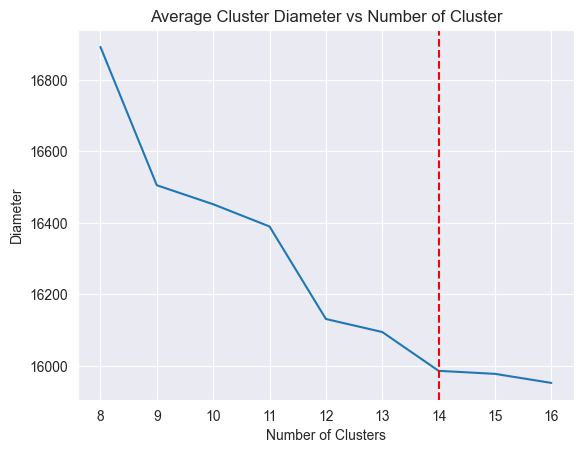

In [17]:
avg_density = {}
avg_diameter = {}

for k in n_clusters:
    avg_diameter[k] = results_df[results_df.n_clusters == k].describe().loc['mean', 'diameter']

sns.lineplot(avg_diameter)
plt.axvline(14, linestyle = 'dashed', color = 'red')
plt.title('Average Cluster Diameter vs Number of Cluster')
plt.xlabel('Number of Clusters')
plt.ylabel('Diameter')
plt.show()

The diameter is a good metric to evaluate the clustering since it tells us the maximum distance between any point in the cluster. When increasing the number of clusters from 14 to 15 the diameter decrease is very small, so $k=14$ can be considered the optimal value of $k$. 
# 1.2. BFR algorithm

In [18]:
from pyspark import SparkContext
from pyspark.sql import SparkSession

sc = SparkContext(appName="Assignment2 - FMA")
spark = SparkSession.builder.appName("Assignment2 - FMA").getOrCreate()
spark

In [19]:
# read features.csv
features_df = spark.read.csv('data/fma/features.csv')

# take rows that are the names of the columns
original_columns = features_df.take(3)

# rename columns according to the guide sheet
new_columns = ['track_id'] + [c1 + '_' + c2 + '_' + c3 for c1, c2, c3 in zip(*original_columns)][1:] # skips first column with track_ids

In [20]:
# Remove first 4 rows and rename the columns by using toDF()
features_df = (features_df.filter(~features_df._c0.isin(['feature', 'statistics', 'number', 'track_id'])) 
               .toDF(*new_columns) 
               )
features_df.show() # final dataframe

+--------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+--------------

In [21]:
k = 14 # optimal number of clusters

### Here we define some function that will be used in the BFR algorithm

In [23]:
def compute_center(points):
    "Compute centroid of group of points"
    
    n = len(points)
    
    # skip empty groups
    if n == 0:
        return None
    return list(np.sum(points, axis = 0)/n)

In [24]:
def euclidean_distance(centroid, point):
    "Compute the euclidean distance between a centroid and a point"
    return np.sqrt(np.sum(np.power(np.subtract(centroid, point), 2)))

In [25]:
def mahalanobis_distance(centroid, stdev, point):
    """Compute Mahalanobis distance of a data point to a given cluster"""

    y = np.subtract(point, centroid) / stdev
    
    # if stdev == 0, this distance would be nan, this way we get some comparable value instead
    if any(x == 0.0 for x in stdev):
        return np.inf
    return np.sqrt(np.sum(y**2))

In [26]:
def compute_summary(points, n):
    "Compute the initial summary of a cluster"
    
    # metrics according to class slides
    sum_i = np.array(points)
    mean = sum_i / n
    sumsq_i = sum_i ** 2
    variance = (sumsq_i / n) - (sum_i / n)**2
    
    summary = {'N': n, 'SUM_i': sum_i, 'SUMSQ_i': sumsq_i, 'AVERAGE': mean, 'VARIANCE': variance, 'STDEV': np.sqrt(variance), 'ID': {points[0]}}
    return summary

In [27]:
def update_summary(points, summary):
    "Update an existing summary with new group of points"
    
    ids = list(map(lambda x: x[0], points)) # gets all ids in a list
    points = list(map(lambda x: x[1], points)) # gets all coordinates in a list
    
    summary['N'] = summary['N'] + len(points)
    summary['SUM_i'] = summary['SUM_i'] + np.sum(points, axis = 0)
    summary['SUMSQ_i'] = summary['SUM_i'] ** 2
    summary['VARIANCE'] = (summary['SUMSQ_i'] / summary['N']) - (summary['SUM_i'] / summary['N'])**2
    summary['STDEV'] = np.sqrt(summary['VARIANCE'])
    summary['ID'].update(ids)

In [28]:
def assign_to_cluster(summaries, point, threshold):
    "Return the cluster index that the point is assigned to"
    
    # if any cluster only has 1 element use the euclidean distance instead
    if any(summary['N'] < 2 for summary in summaries.values()):
        # use the summary 'AVERAGE' since it is also the centroid
        distances = [euclidean_distance(summary['AVERAGE'], point) for summary in summaries.values()]
        cluster = np.argmin(distances) # index of minimum value is the cluster index
        
    else:
        distances = [mahalanobis_distance(summary['AVERAGE'], summary['STDEV'], point) for summary in summaries.values()]
        cluster = np.argmin(distances)
        if distances[cluster] > threshold:
            return None
    
    return cluster

In [29]:
def cs_assign(summaries, point, threshold):
    "Assign point from the compression set to cluster"
    
    # if any cluster only has 1 element use the euclidean distance instead
    if any(summary['N'] < 2 for summary in summaries.values()):
        distances = [euclidean_distance(summary['AVERAGE'], point) for summary in summaries.values()]
        cluster = np.argmin(distances)
        
    else:
        distances = [mahalanobis_distance(summary['AVERAGE'], summary['STDEV'], point) for summary in summaries.values()]
        cluster = np.argmin(distances)
        
        # if no cluster is within the threshold create a new cluster with the point
        if distances[cluster] > threshold:
            summaries[len(summaries)] = compute_summary(point, 1)
    
    return cluster

In [30]:
def bfr(rdd, k, threshold_distance):
    "Implementation of the BFR algorithm"
    
    # Get a random sample from the rdd and get its summaries
    centroids = rdd.takeSample(False, k, 12345)
    summaries = {c: compute_summary(centroid[1], 1) for c, centroid in enumerate(centroids)}
    discard_set = []
    retained_set = []

    # Divide the remaining data into compression sets and process them iteratively
    compression_sets = rdd.filter(lambda x: x[1] not in centroids).randomSplit([10]*10, 12345)
    for comp_set in tqdm(compression_sets):

        # Assign points to initial clusters
        assignments = comp_set.map(lambda x: (assign_to_cluster(summaries, x[1], threshold_distance), x))

        # current discard set is made up of every point that was initially assigned to a cluster
        discarded = (assignments.groupByKey().mapValues(list)
                  .filter(lambda x: x[0] != None)
                  .collect()
                  )
        # update summaries with the points from the intial discard set
        for cluster, points in discarded:
            update_summary(points, summaries[cluster])
        
        # retained set made up of remaining points
        retained = assignments.filter(lambda x: x[0] == None)
        
        # from these retained set, select 10 random points and compute their summaries
        cs_centroids = retained.map(lambda x: x[1]).takeSample(False, 10, 12345)
        cs_summaries = {c: compute_summary(centroid[1], 1) for c, centroid in enumerate(cs_centroids)}
        
        # assign points from retained set to the compression set clusters
        cs_assignments = retained.map(lambda x: (assign_to_cluster(cs_summaries, x[1][1], threshold_distance), x[1])).groupByKey().mapValues(list)
        
        # add recently assigned points to discard set
        new_discard = cs_assignments.filter(lambda x: x[0] != None).collect()
        
        # update compression set centroids again
        for cluster, points in new_discard:
            update_summary(points, cs_summaries[cluster])
    
    # remove clusters that only have 1 point and keep them as outliers
    for cluster, summary in cs_summaries.items():
        if summary['N'] < 2:
            retained.append(summary)
            del cs_summaries[cluster]
    
    discard_set = [summaries, cs_summaries]

    # Return final set of clusters and their summaries
    return discard_set, retained_set

### Functions defined we can now run the algorithm and cluster the dataset

In [31]:
features_rdd = features_df.rdd.map(lambda row: (row[0], [float(item) for item in row[1:]]))
features_rdd.count()

106574

In [32]:
discard, retained = bfr(features_rdd, k, 3)

100%|██████████| 10/10 [18:43<00:00, 112.32s/it]


## 1.3. Use the previous cluster and see the most common genres in each one.

In [33]:
# columns with id and genres
tracks_df[tracks_df.columns[[0, 40]]]

,0,40
0,NaN,track
1,NaN,genre_top
2,track_id,NaN
3,2,Hip-Hop
4,3,Hip-Hop
...,...,...
106572,155316,Rock
106573,155317,Rock
106574,155318,Rock
106575,155319,Rock


Create new dataframe with id as index and the genre as the only column, drop nan values which reduced the number of rows to about half

In [34]:
genre_df = tracks_df[[0, 40]]
genre_df = genre_df.dropna().set_index(0)
print(pd.unique(genre_df[40]))
print(f'shape of tracks dataframe: {tracks_df.shape}')
print(f'shape of genres dataframe: {genre_df.shape} -> dropped nan values')
genre_df.head()

['Hip-Hop' 'Pop' 'Rock' 'Experimental' 'Folk' 'Jazz' 'Electronic' 'Spoken'
 'International' 'Soul-RnB' 'Blues' 'Country' 'Classical'
 'Old-Time / Historic' 'Instrumental' 'Easy Listening']
shape of tracks dataframe: (106577, 53)
shape of genres dataframe: (49598, 1) -> dropped nan values


,40
0,
2,Hip-Hop
3,Hip-Hop
5,Hip-Hop
10,Pop
134,Hip-Hop


Join the dictionaries into one

In [35]:
discard_clusters = {c: {'N': discard[0][c]['N'], 'CENTROID': discard[0][c]['AVERAGE'], 'ID': discard[0][c]['ID']} for c in discard[0]}

for c in discard[1]:
    discard_clusters[len(discard_clusters) + c] = {'N': discard[1][c]['N'], 'CENTROID': discard[1][c]['AVERAGE'], 'ID': discard[1][c]['ID']}

By counting the number of elements in the clustered points, we see that they have approximately the same number as the BFR clusters.

In [36]:
count = 0
for c in discard_clusters:
    print(c, discard_clusters[c]['N'])
    count += discard_clusters[c]['N']
count

0 807
1 2369
2 436
3 880
4 263
5 626
6 837
7 276
8 21915
9 627
10 666
11 268
12 733
13 17049
14 144
16 72
18 356
20 192
22 68
24 163
26 98
28 128
30 314
32 83


49370

Associate each id with a genre and count in each cluster, then return the most counted genre

In [38]:
for c in discard_clusters:
    discard_clusters[c]['genres'] = []
    
    for point in discard_clusters[c]['ID']:
        # some 'ids' had anomalous values such as floats
        if point in genre_df.index:
                # append the genre association
                discard_clusters[c]['genres'].append(genre_df.loc[point])
                # count each genre in the cluster, return_counts returns an array with the count for each genre
                genres = np.unique(discard_clusters[c]['genres'], return_counts=True)
                # get most counted genre
                top_genre = np.argmax(genres[1])
                discard_clusters[c]['TopGenre'] = genres[0][top_genre]

Finally we can print the results

In [39]:
for c in discard_clusters:
    print(f"Cluster {c} top genre: {discard_clusters[c]['TopGenre']}")

Cluster 0 top genre: Rock
Cluster 1 top genre: Rock
Cluster 2 top genre: Electronic
Cluster 3 top genre: Electronic
Cluster 4 top genre: Old-Time / Historic
Cluster 5 top genre: Rock
Cluster 6 top genre: Experimental
Cluster 7 top genre: Rock
Cluster 8 top genre: Rock
Cluster 9 top genre: Rock
Cluster 10 top genre: Experimental
Cluster 11 top genre: Rock
Cluster 12 top genre: Experimental
Cluster 13 top genre: Rock
Cluster 14 top genre: Experimental
Cluster 16 top genre: Electronic
Cluster 18 top genre: Folk
Cluster 20 top genre: Electronic
Cluster 22 top genre: Rock
Cluster 24 top genre: Experimental
Cluster 26 top genre: Experimental
Cluster 28 top genre: Rock
Cluster 30 top genre: Folk
Cluster 32 top genre: Electronic
